In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv")
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())
display(df.head())

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


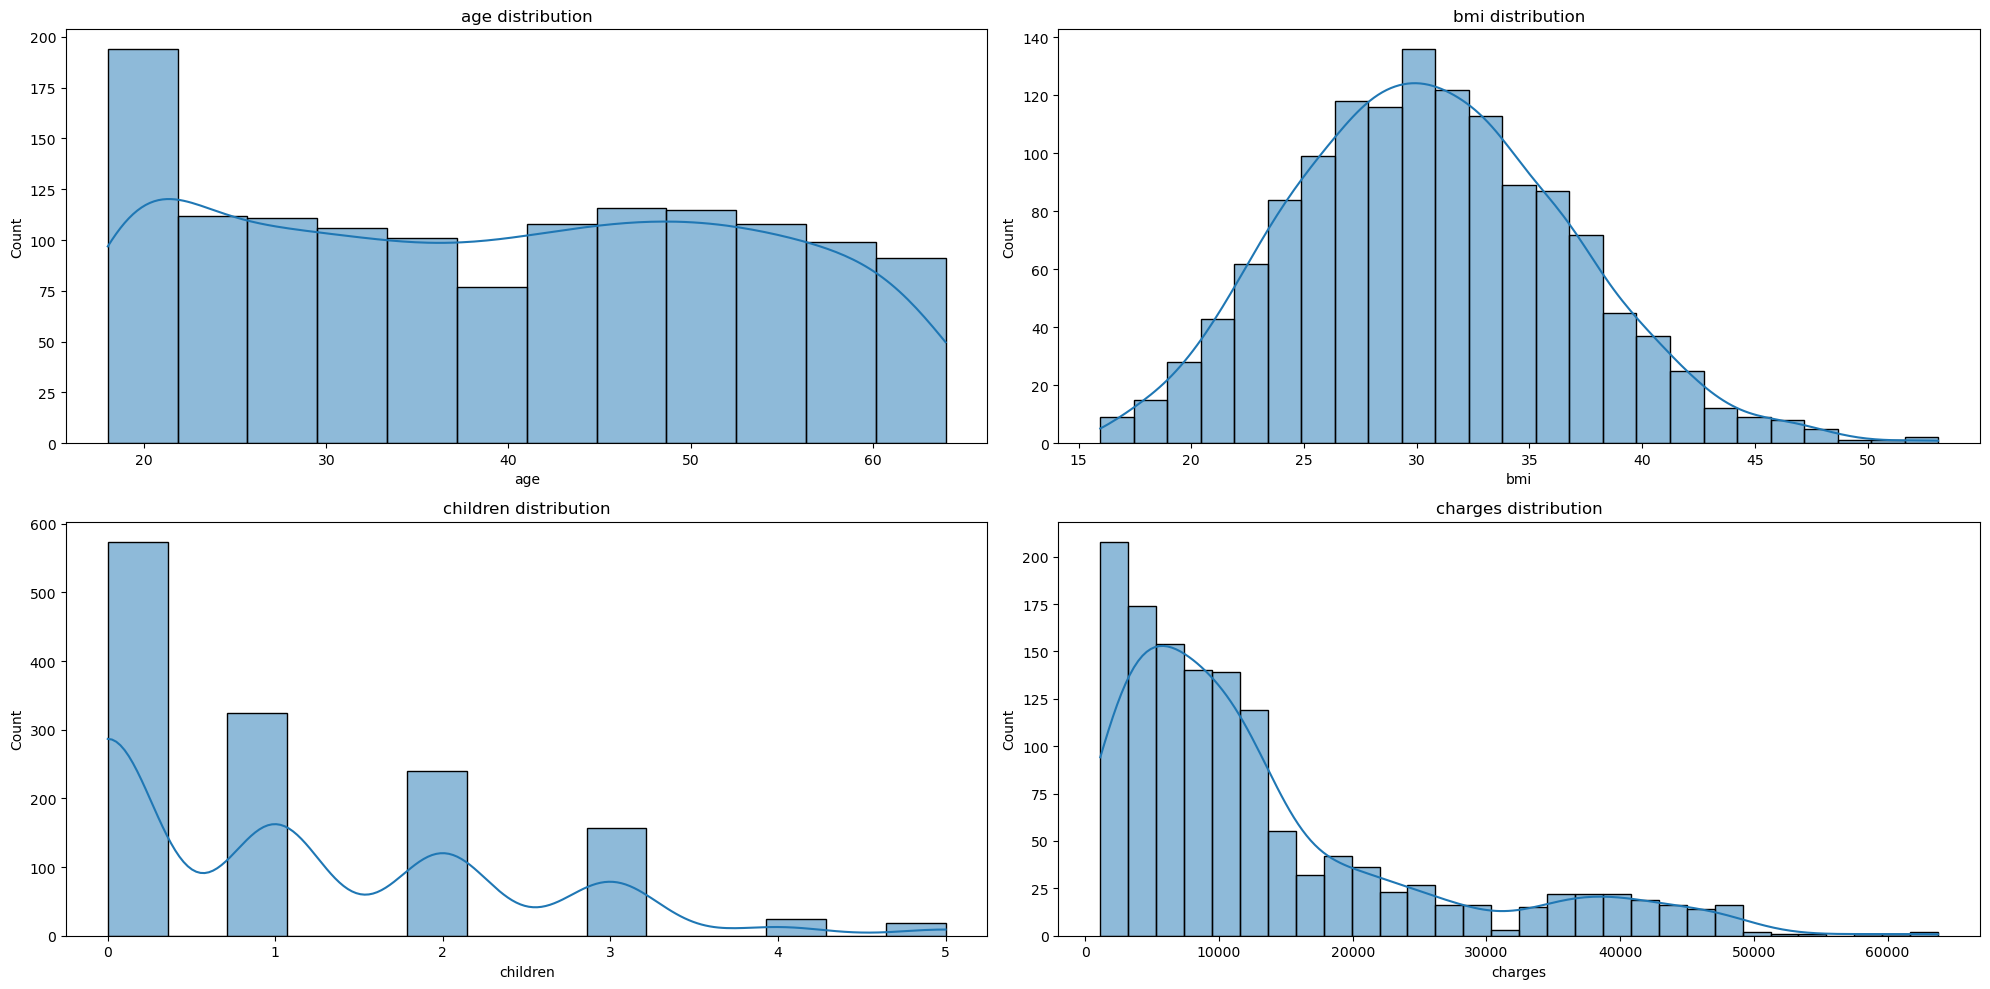

In [3]:
num_columns = [i for i in df.columns if df[i].dtype != "O"]
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax = ax.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(
        x = col,
        data = df, 
        ax = ax[i],
        kde = True
    )
    ax[i].set_title(f"{col} distribution")

plt.tight_layout()
plt.show()

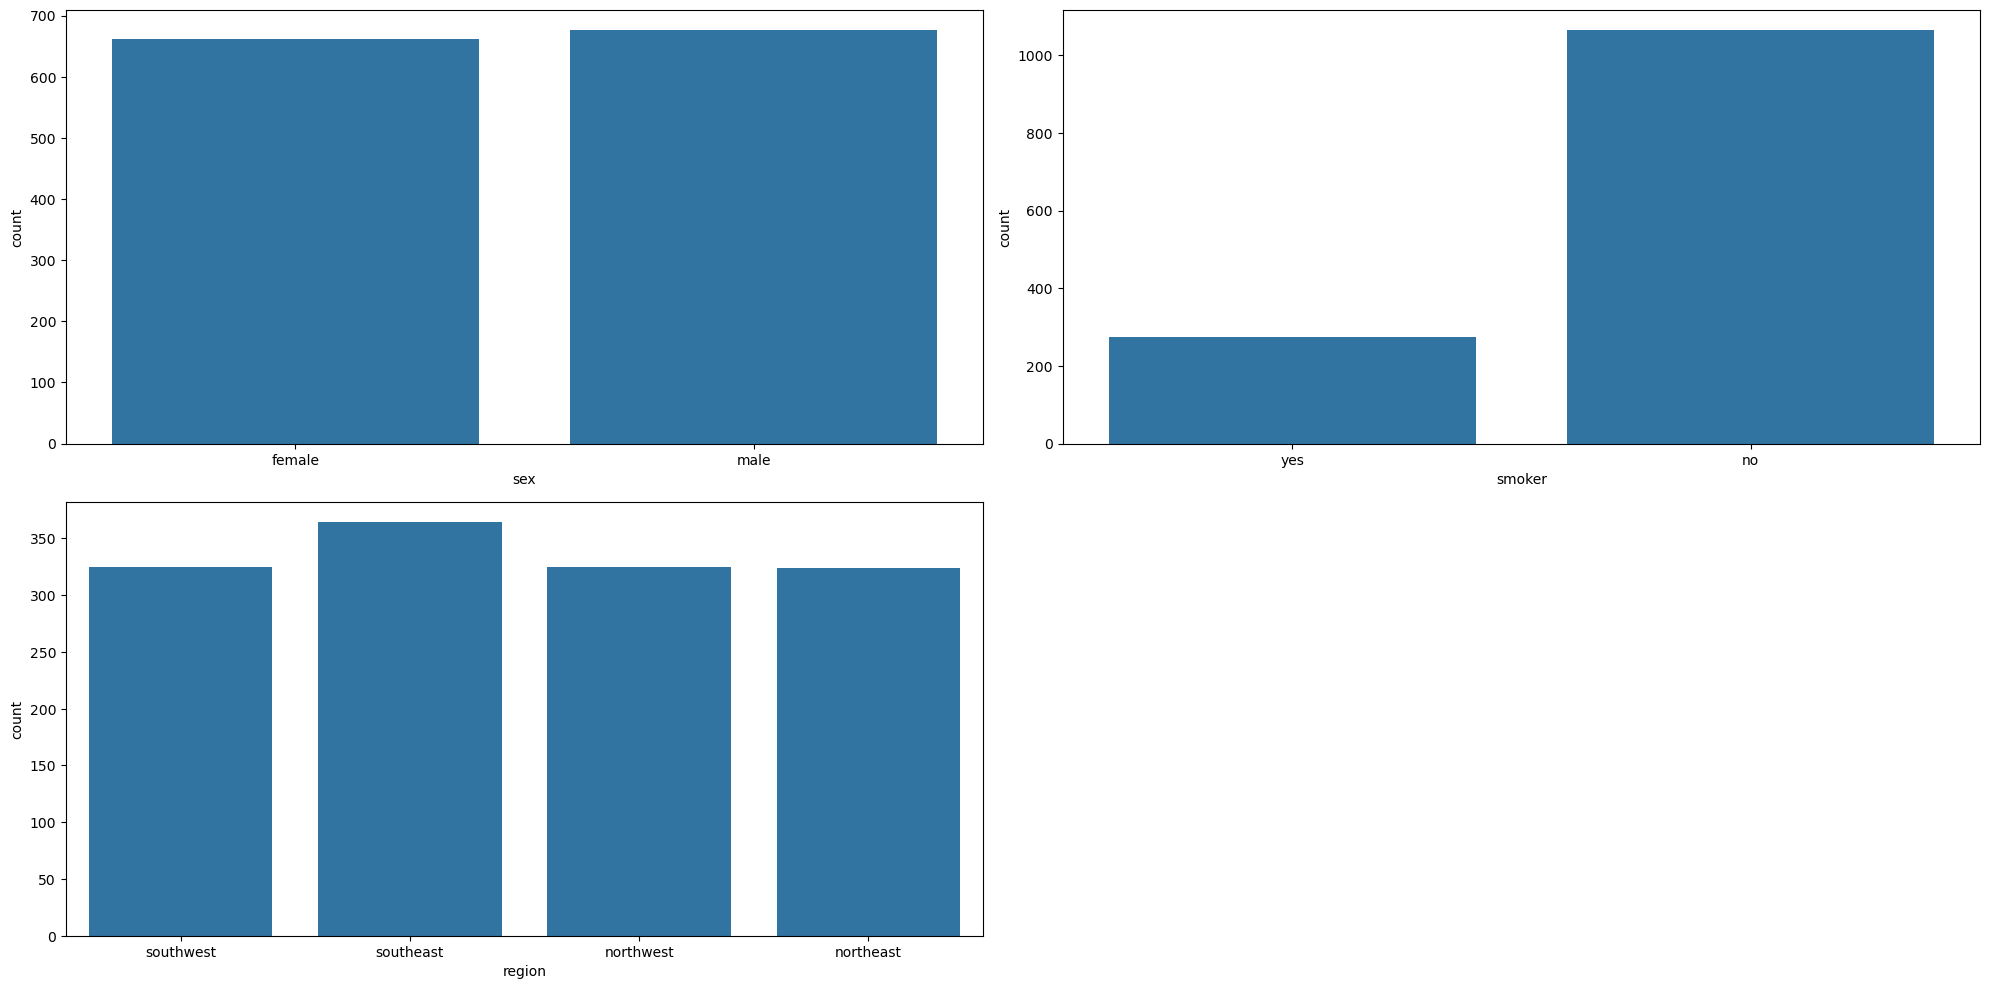

In [4]:
cat_columns = [i for i in df.columns if df[i].dtype == "O"]
fig1, ax1 = plt.subplots(2,2,figsize=(20,10))
ax1 = ax1.flatten()

for i, col in enumerate(cat_columns):
    sns.countplot(
        x = col,
        data = df,
        ax = ax1[i]
    )
    ax[i].set_title(f"{col} barplot")

for i in range(i+1, len(ax1)):
    ax1[i].axis("off")

plt.tight_layout()
plt.show()

In [5]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df["sex"] = np.where(df["sex"] == "male", 1, 0)
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [7]:
print(df["smoker"].unique())
print(df["smoker"].value_counts())

['yes' 'no']
smoker
no     1064
yes     274
Name: count, dtype: int64


In [8]:
df["smoker"] = np.where(df["smoker"] == "no", 0, 1)
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
df["region"].unique()
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df, columns=["region"], drop_first=True)
print(df_encoded.info())
display(df_encoded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(3), float64(2), int32(2), int64(2)
memory usage: 56.3 KB
None


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [11]:
df_encoded["region_northwest"] = np.where(df_encoded["region_northwest"] == False, 0, 1)
df_encoded["region_southeast"] = np.where(df_encoded["region_southeast"] == False, 0, 1)
df_encoded["region_southwest"] = np.where(df_encoded["region_southwest"] == False, 0, 1)
display(df_encoded.head())

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   int32  
 7   region_southeast  1338 non-null   int32  
 8   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 68.1 KB


In [13]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop("charges", axis=1)
y = np.log1p(df_encoded["charges"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression and Friends

In [15]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MSE:  0.1754741235344947
MAE:  0.2653460530277759
SCORE:  0.784682844194831


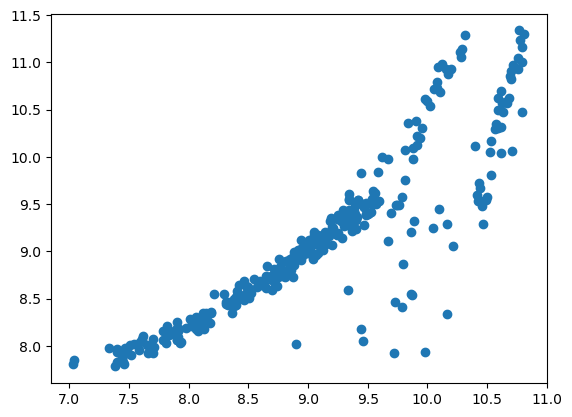

In [16]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("SCORE: ", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.show()

MSE:  0.17539738978281974
MAE:  0.2654651998912815
SCORE:  0.7847770010587156


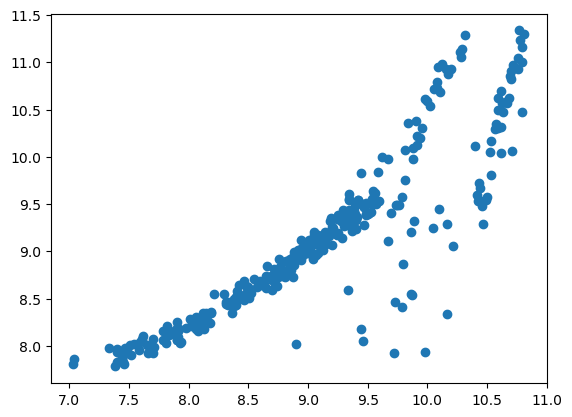

In [17]:
ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)
y_pred1 = ridge.predict(X_test_scaled)
print("MSE: ", mean_squared_error(y_test, y_pred1))
print("MAE: ", mean_absolute_error(y_test, y_pred1))
print("SCORE: ", r2_score(y_test, y_pred1))

plt.scatter(y_test, y_pred1)
plt.show()

MSE:  0.17544100021541711
MAE:  0.2652663759251617
SCORE:  0.7847234884716676


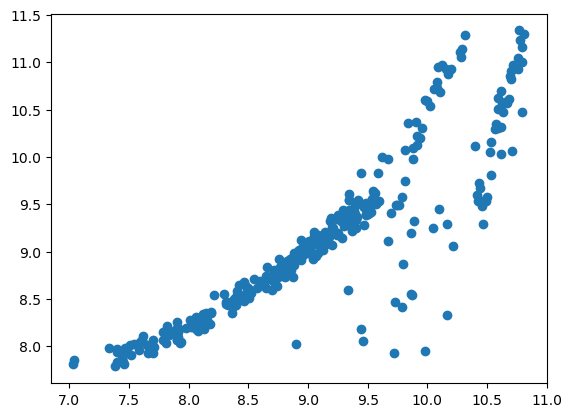

In [18]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
y_pred2 = lasso.predict(X_test_scaled)
print("MSE: ", mean_squared_error(y_test, y_pred2))
print("MAE: ", mean_absolute_error(y_test, y_pred2))
print("SCORE: ", r2_score(y_test, y_pred2))

plt.scatter(y_test, y_pred2)
plt.show()

MSE:  0.17539587527728587
MAE:  0.2653383536197913
SCORE:  0.7847788594468211


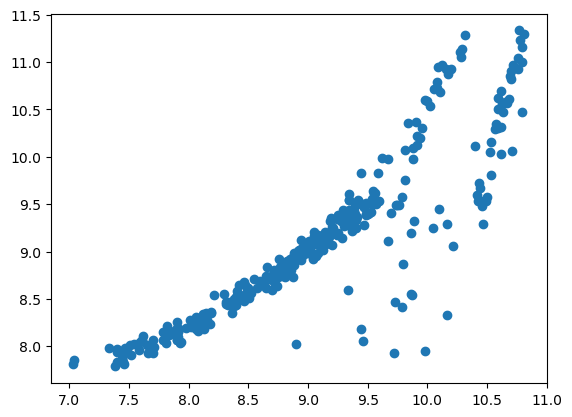

In [19]:
elastic = ElasticNetCV(cv=5)
elastic.fit(X_train_scaled, y_train)
y_pred3 = elastic.predict(X_test_scaled)
print("MSE: ", mean_squared_error(y_test, y_pred3))
print("MAE: ", mean_absolute_error(y_test, y_pred3))
print("SCORE: ", r2_score(y_test, y_pred3))

plt.scatter(y_test, y_pred3)
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    model = RidgeCV(cv=5)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    print("Degree:", degree)
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("SCORE: ", r2_score(y_test, y_pred), "\n")

Degree: 1
MSE:  0.1753973897828199
MAE:  0.2654651998912803
SCORE:  0.7847770010587154 

Degree: 2
MSE:  0.12175950009340694
MAE:  0.20099121886101995
SCORE:  0.8505938726218064 

Degree: 3
MSE:  0.13165445185488492
MAE:  0.2041067049217025
SCORE:  0.8384521800052768 

Degree: 4
MSE:  0.17230487900858854
MAE:  0.24462324932880097
SCORE:  0.7885716951753864 



# SVR

MSE:  0.12172354231010529
MAE:  0.15558448678434633
SCORE:  0.8506379949543397


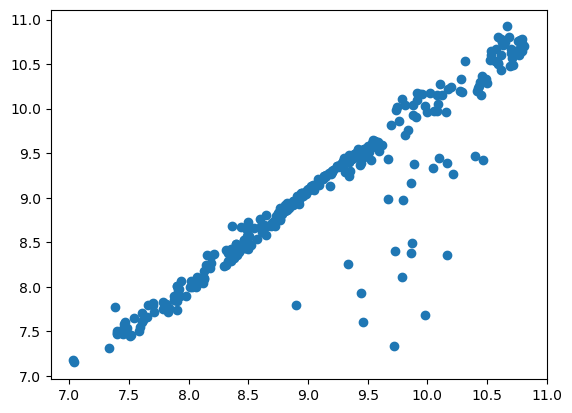

In [21]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred4 = svr.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred4))
print("MAE: ", mean_absolute_error(y_test, y_pred4))
print("SCORE: ", r2_score(y_test, y_pred4))

plt.scatter(y_test, y_pred4)
plt.show()

MSE:  0.12172354231010529
MAE:  0.15558448678434633
SCORE:  0.8506379949543397
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


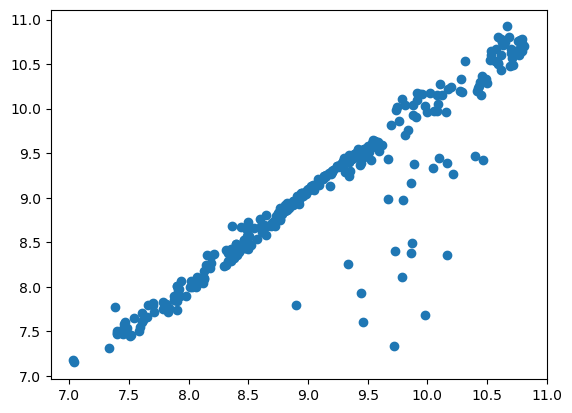

In [22]:
from sklearn.model_selection import GridSearchCV
params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["auto", "scale"]
}
grid = GridSearchCV(estimator=SVR(), param_grid=params, scoring="r2", cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
y_pred5 = grid.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred5))
print("MAE: ", mean_absolute_error(y_test, y_pred5))
print("SCORE: ", r2_score(y_test, y_pred5))
print(grid.best_params_)

plt.scatter(y_test, y_pred5)
plt.show()

MSE:  0.15609406160293401
MAE:  0.240201298480891
SCORE:  0.8084633294902106


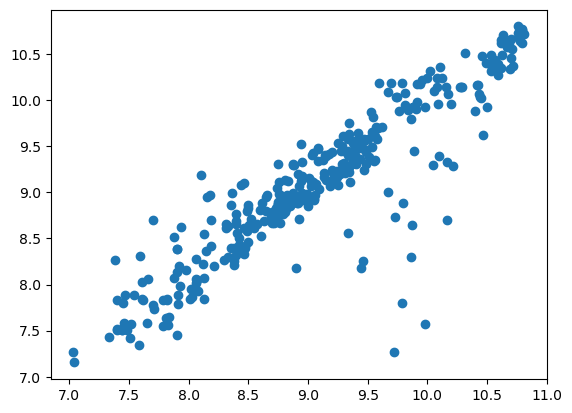

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred6 = knn.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred6))
print("MAE: ", mean_absolute_error(y_test, y_pred6))
print("SCORE: ", r2_score(y_test, y_pred6))

plt.scatter(y_test, y_pred6)
plt.show()

MSE:  0.1421155811172409
MAE:  0.23466999826378626
SCORE:  0.8256157540188667


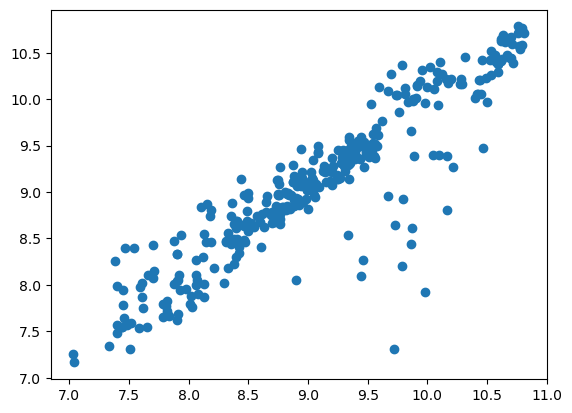

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred6 = knn.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred6))
print("MAE: ", mean_absolute_error(y_test, y_pred6))
print("SCORE: ", r2_score(y_test, y_pred6))

plt.scatter(y_test, y_pred6)
plt.show()

MSE:  0.1392891767689739
MAE:  0.23486303523887123
SCORE:  0.829083919769839


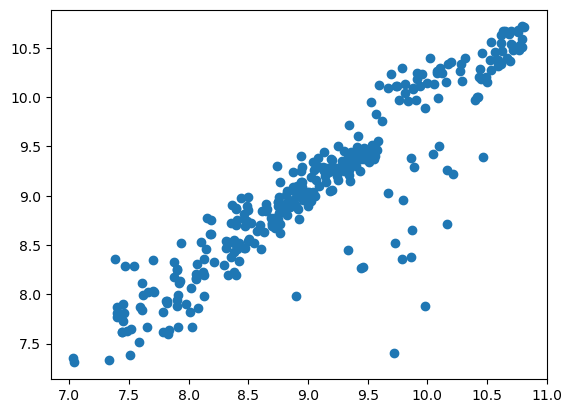

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
y_pred6 = knn.predict(X_test_scaled)

print("MSE: ", mean_squared_error(y_test, y_pred6))
print("MAE: ", mean_absolute_error(y_test, y_pred6))
print("SCORE: ", r2_score(y_test, y_pred6))

plt.scatter(y_test, y_pred6)
plt.show()

MSE:  0.2502317427654363
MAE:  0.22379671047442673
SCORE:  0.692950812010565


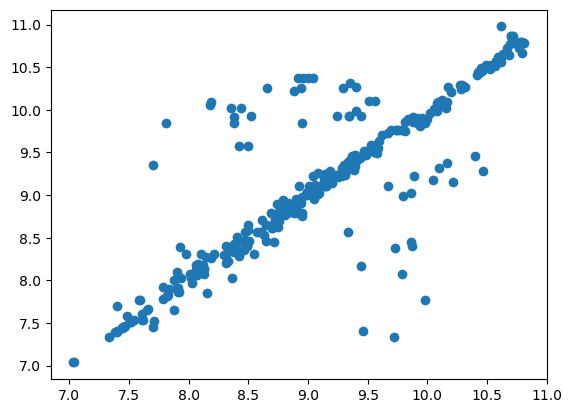

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred7 = tree.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred7))
print("MAE: ", mean_absolute_error(y_test, y_pred7))
print("SCORE: ", r2_score(y_test, y_pred7))

plt.scatter(y_test, y_pred7)
plt.show()

MSE:  0.1442490979905565
MAE:  0.20763866673240497
SCORE:  0.8229978022903068
{'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'splitter': 'best'}


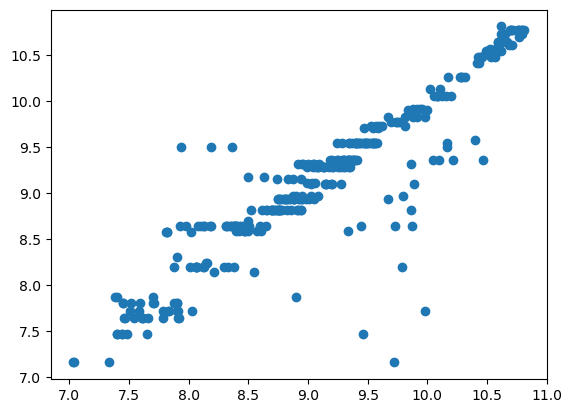

In [27]:
params1 = {
    "criterion": ["squared_error", "friedman_mse"],
    "splitter": ["best"],
    "max_depth": [6,7,8,9,None],
    "max_features": ["sqrt", "log2", None]
}
grid1 = GridSearchCV(estimator=DecisionTreeRegressor(), scoring="r2", n_jobs=-1, cv=5, param_grid=params1)
grid1.fit(X_train, y_train)
y_pred8 = grid1.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred8))
print("MAE: ", mean_absolute_error(y_test, y_pred8))
print("SCORE: ", r2_score(y_test, y_pred8))
print(grid1.best_params_)

plt.scatter(y_test, y_pred8)
plt.show()